#  Subscribed Term Deposit Classification

# Introduction


The data is related with direct marketing campaigns of a Portuguese banking institution (Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.) 

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be YES or NO subscribed.


Using this data, I am going to work on a **binary classification problem** to predict if the client will subscribe a term deposit (variable y) based on the their personal informations. The dataset has a total of 41188 rows, which represent 41188 different clients.


In this project, I will use to perfrom the following steps to exlore the data and train multiple machine learning models:

* **feature selection**
* **feature engineer**
* **data pre-processing**.
* handling **missing data** .
* handling **categorical** and **numerical** data .
* **outliers** detection
* **model evaluation**.
    
## Libraries to use

* sklearn, matplotlib, numpy, pandas, seaborn, scipy

## Models to use

* 4 different models to train the data, so we can compare between them 

    **a) Logistic Regression**
    
    **b) KNN**
    
    **c) Support Vector Machine**
    
    **d) Random Forest**
    


In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";")

# Exploratory data analysis

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

# We got some lots of categorical columns, and it's a binary classification ('yes', 'no')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

# We have missing data , we will handle them as we go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Describe the numerical data

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# describe categorical data ("objec")

df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [8]:
# In this project we will focus on the personal information and disregard the social and economic context attributes in the data.
# Therefore, we will drop contact, month, day_of_week, emp.var.rate, cons.price.idx, cons.conf.idx.

df.drop(['contact','month','day_of_week','emp.var.rate', 'cons.price.idx', 'cons.conf.idx'] , axis=1, inplace=True)

In [9]:
df.duplicated().any()

# we got duplicated rows

True

In [10]:
df = df.drop_duplicates()

# we removed duplicated rows
 
df.duplicated().any()

# we got no duplicated rows now

False

The percentage of Y class : 0.11
The percentage of N class : 0.89


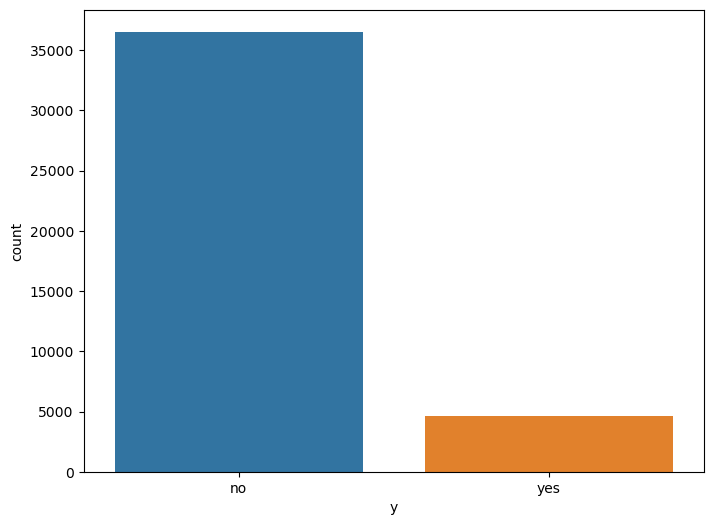

In [11]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df, x= "y");

print('The percentage of Y class : %.2f' % (df['y'].value_counts()[1] / len(df)))
print('The percentage of N class : %.2f' % (df['y'].value_counts()[0] / len(df)))


# We can consider it as imbalanced data

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

## Categorical features


In [13]:
df.head(1)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,4.857,5191.0,no


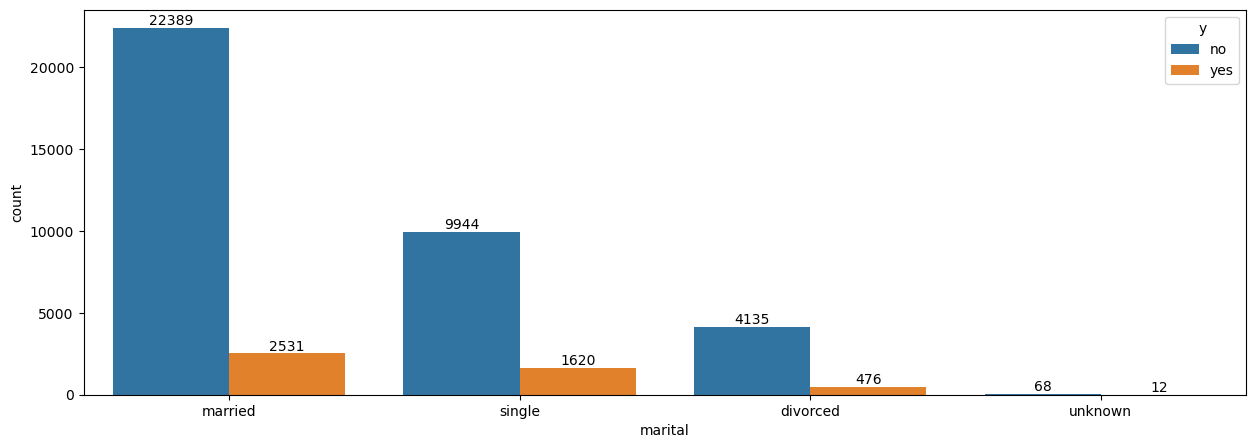

In [14]:
# Marital

plt.figure(figsize=(15,5))
ax = sns.countplot(x='marital', hue='y', data=df);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])



# People who get married and divorced are more likely subscribed a term deposit versus people who are single (~90% vs ~0.85)
# It can be a good feature but the difference in ratio is only marginal. 
print()

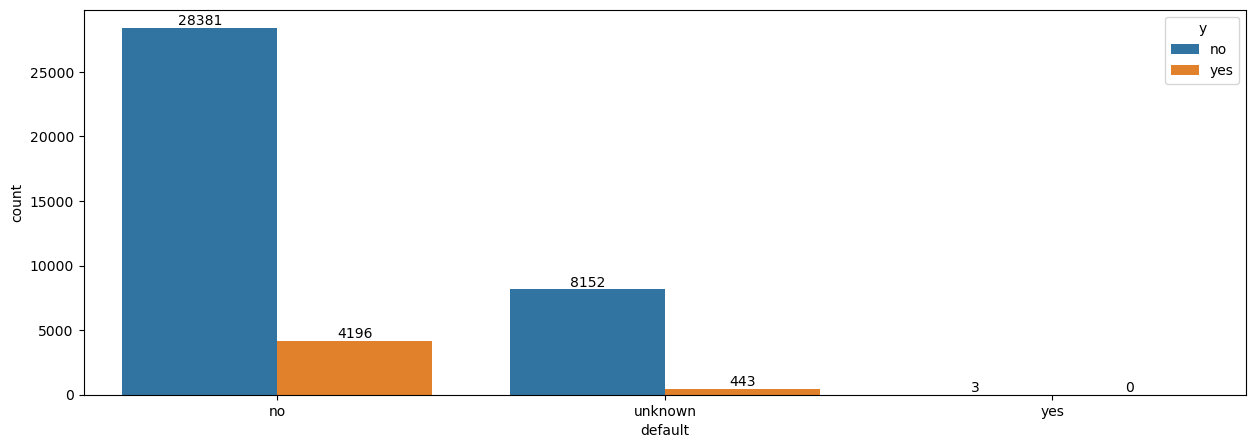

In [15]:
# Default

plt.figure(figsize=(15,5))
ax = sns.countplot(x='default', hue='y', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# People who has credit in default or in unknown status have higher chance to subscribe to a term deposit than
# people who haven't have credit in default.

# i think it's important feature
print()

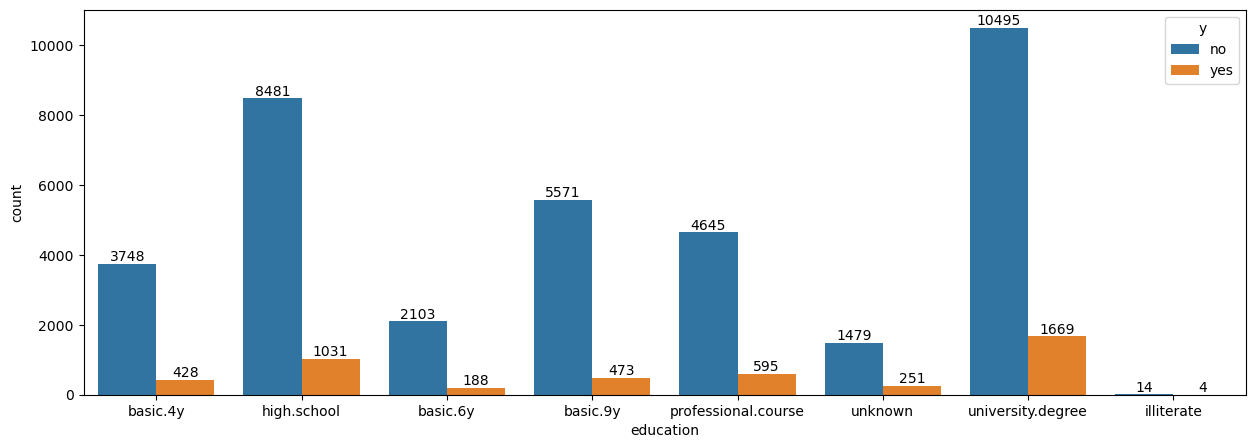

In [16]:
# Education

plt.figure(figsize=(15,5))
ax = sns.countplot(x='education', hue='y', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


# It is very suprising that people with lower level of education tends to subscribe more to term deposit than
# people with higher education and are having professional career.
print()

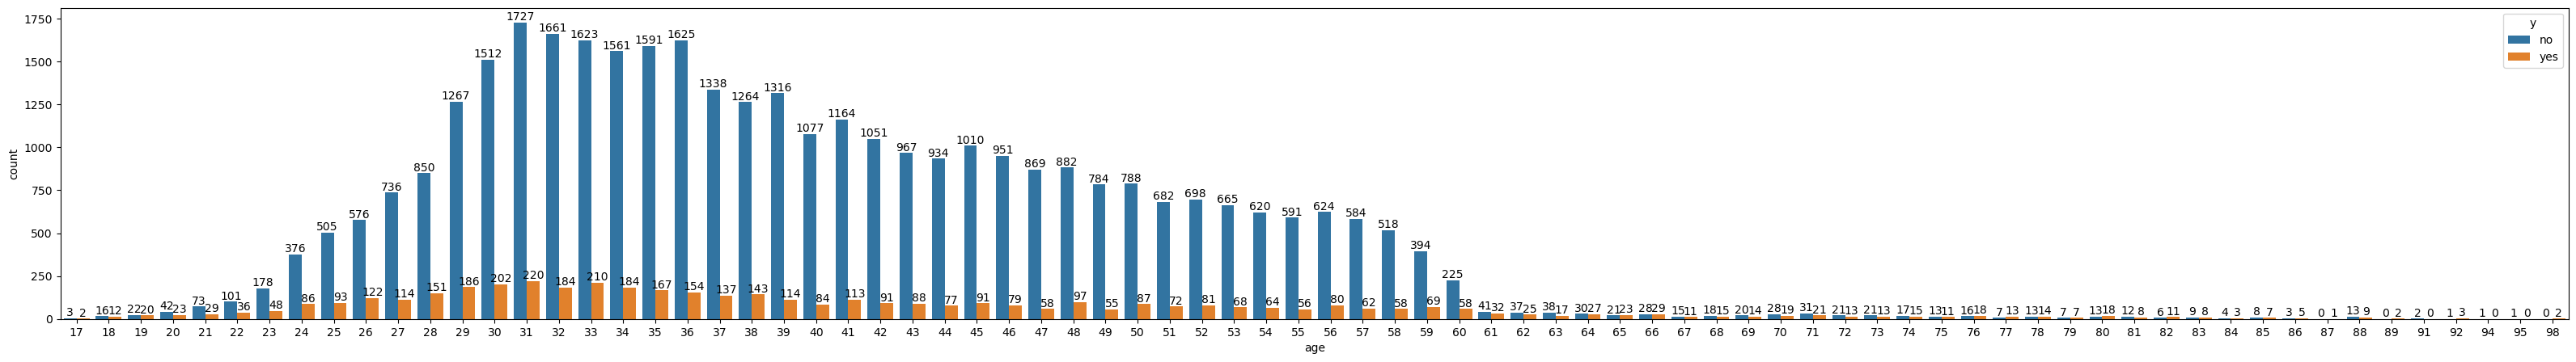

In [17]:
# Age

plt.figure(figsize=(40,5))
ax = sns.countplot(x='age', hue='y', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

print()

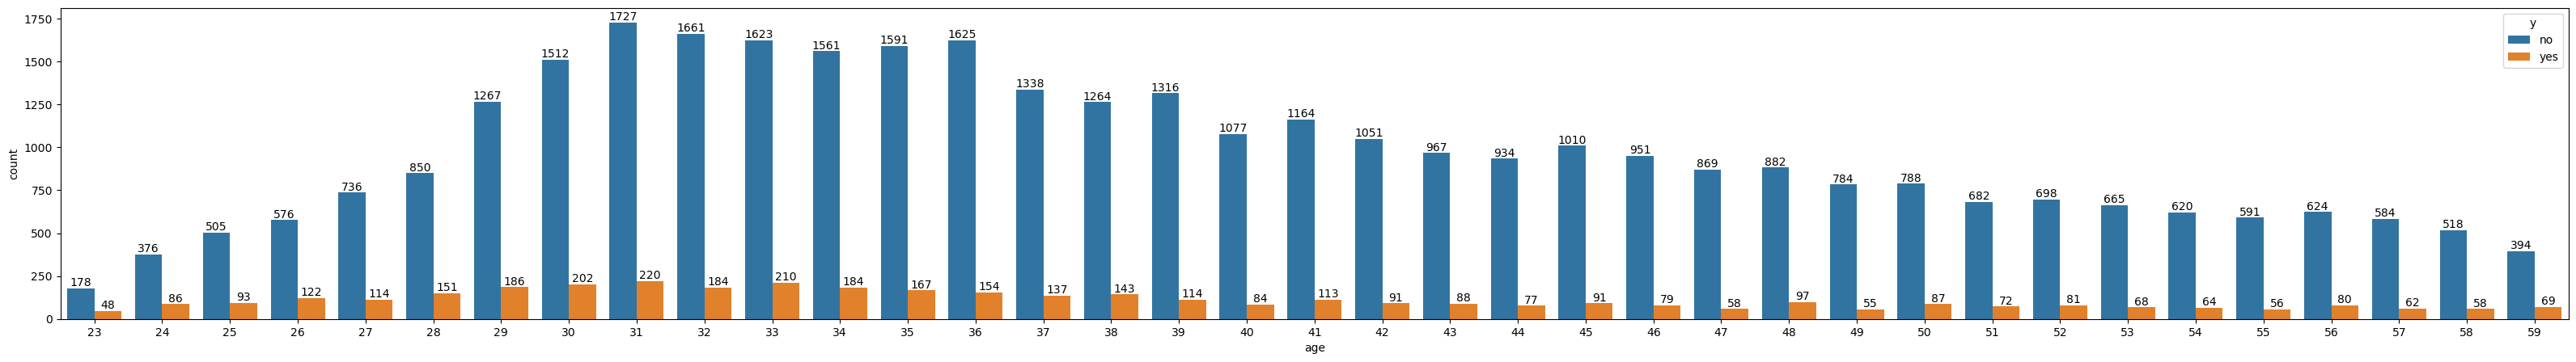

In [18]:
# Since the number of people in ages of range [22,60] takes the majority of the data, 
# we will create another plot with the filtered data. 

plt.figure(figsize=(40,5))
ax = sns.countplot(x='age', hue='y', data=df[(df['age'] > 22) & (df['age'] < 60)])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# It can be seen that people with higher ages have a higher possibilities 
# to subscribe to term deposit compared to younger people.
print()

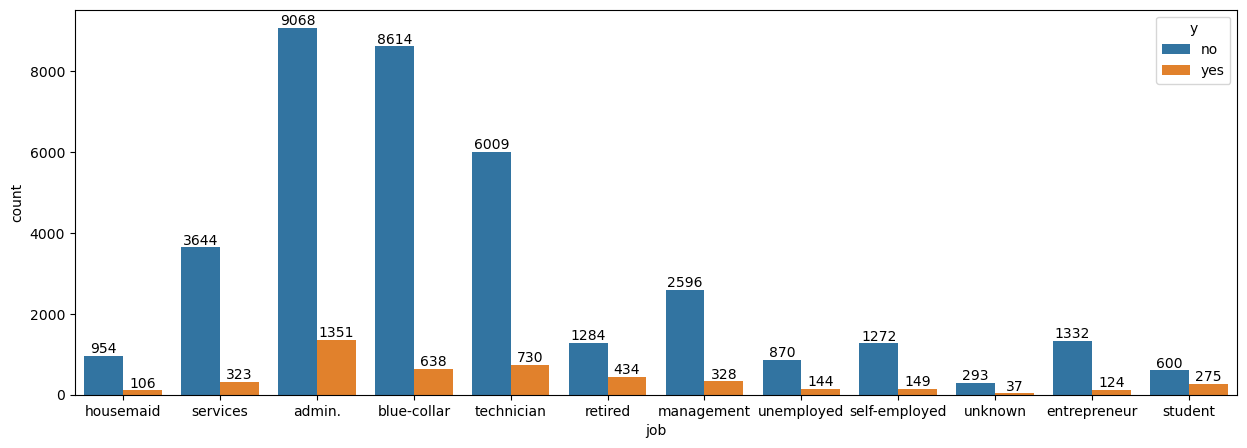

In [19]:
# Job

plt.figure(figsize=(15,5))
ax = sns.countplot(x='job', hue='y', data=df);

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
print()
# It is easy to see that housemiad, retired people and student are the people with the highest rates to subscribe to a term deposit
# while blue-collar, people in services and entrepreneur are the least likely to subscribe. 

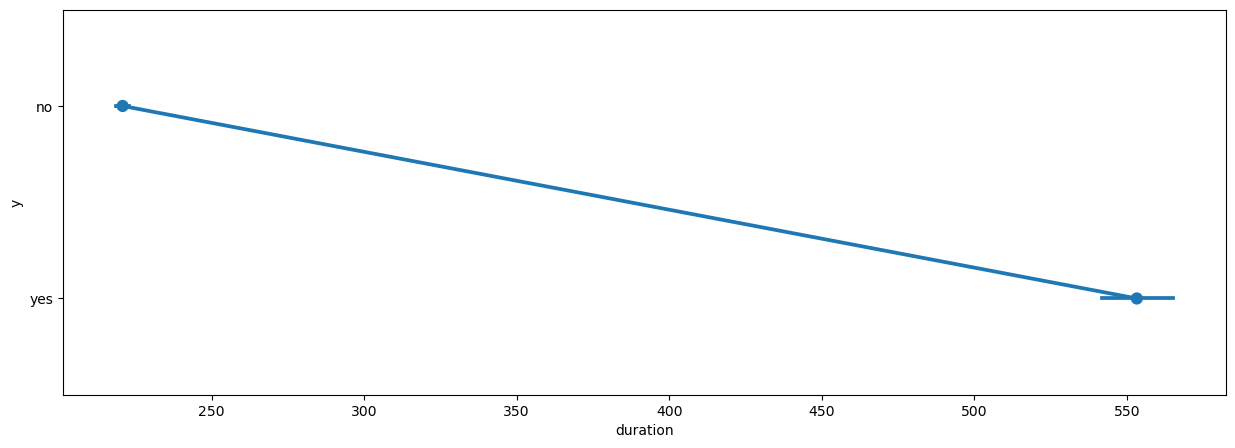

In [20]:
# Duration

plt.figure(figsize=(15,5))
sns.pointplot(x='duration', y='y', data=df);

# There is significant difference in the last call duration between 'yes' and 'no' label 
# If the last call is longer, we will have a much higher chance of that customer to subcribe to the term deposit.
# It is a very important feature

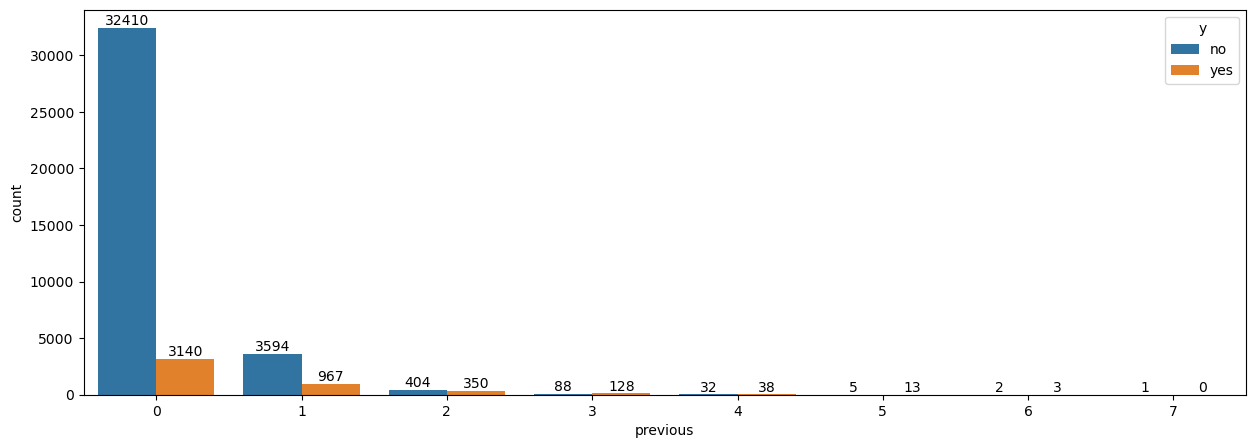

In [21]:
# Previous

plt.figure(figsize=(15,5))
ax = sns.countplot(x='previous', hue='y', data=df);

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
print()
# if number of previous contact higher then we will have higher chance of that customer subcribe term deposit. ????
# We can see that as the number of previous contacts increasing, the chance of people subscribed to the deposit keeps decreasing.

In [22]:
# the numerical data

df.groupby('y').median() # median because Not affected with outliers

# We can see that when we have a very high median in duration for 'yes' label compared to 'no' label
# Thus, we can make sure that duration is a good feature

,age,duration,campaign,pdays,previous,euribor3m,nr.employed
y,,,,,,,
no,38.0,164.0,2.0,999.0,0.0,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,1.266,5099.1


## Data Preprocessing

### Missing values

Currently, the data has no missing data.

In [23]:
df.isnull().sum().any() 

False

In [24]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []
num_columns = []
cat_columns = []

for i, c in enumerate(df.columns):
    if df[c].dtypes == object:
        cat_data.append(df.iloc[:, i])
        cat_columns.append(c)
    else :
        num_columns.append(c)
        num_data.append(df.iloc[:, i])

print('Numeric columns: ', num_columns)
print('Categorical columns: ', cat_columns)

Numeric columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'euribor3m', 'nr.employed']
Categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']


In [25]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [26]:
cat_data.head()

,job,marital,education,default,housing,loan,poutcome,y
0,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,services,married,high.school,unknown,no,no,nonexistent,no
2,services,married,high.school,no,yes,no,nonexistent,no
3,admin.,married,basic.6y,no,no,no,nonexistent,no
4,services,married,high.school,no,no,yes,nonexistent,no


In [27]:
num_data.head()

,age,duration,campaign,pdays,previous,euribor3m,nr.employed
0,56.0,261.0,1.0,999.0,0.0,4.857,5191.0
1,57.0,149.0,1.0,999.0,0.0,4.857,5191.0
2,37.0,226.0,1.0,999.0,0.0,4.857,5191.0
3,40.0,151.0,1.0,999.0,0.0,4.857,5191.0
4,56.0,307.0,1.0,999.0,0.0,4.857,5191.0


### Categorical columns

For cateogorical columns, we are going to use **OneHotEncoder** to transform the features into dummy features for better representation. :

In [28]:
from sklearn.preprocessing import OneHotEncoder  
cat_data.head()

,job,marital,education,default,housing,loan,poutcome,y
0,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,services,married,high.school,unknown,no,no,nonexistent,no
2,services,married,high.school,no,yes,no,nonexistent,no
3,admin.,married,basic.6y,no,no,no,nonexistent,no
4,services,married,high.school,no,no,yes,nonexistent,no


In [29]:
# transform the target column

target_values = {'yes': 1 , 'no' : 0}

target = cat_data['y']
cat_data.drop('y', axis=1, inplace=True)

target = target.map(target_values)

In [30]:
# transform other columns

transformed_cat_data = pd.get_dummies(cat_data)

In [31]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [32]:
transformed_cat_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
41184,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
41185,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [33]:
df = pd.concat([transformed_cat_data, num_data, target], axis=1)

In [34]:
df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,1,0,56.0,261.0,1.0,999.0,0.0,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,57.0,149.0,1.0,999.0,0.0,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,37.0,226.0,1.0,999.0,0.0,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,40.0,151.0,1.0,999.0,0.0,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,56.0,307.0,1.0,999.0,0.0,4.857,5191.0,0


# Model Training

## Splitting the data
In this section, we are going to use **StratifiedShuffleSplit** to split the data and train our models, for more [information](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) .

In [35]:
X = df.drop('y', axis=1)
y = df['y'] 

In [36]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['y'].value_counts().values/ len(df))

X_train shape (32940, 43)
y_train shape (32940,)
X_test shape (8235, 43)
y_test shape (8235,)

ratio of target in y_train : [0.88734062 0.11265938]
ratio of target in y_test : [0.88731026 0.11268974]
ratio of target in original_data : [0.88733455 0.11266545]


In [37]:
X_test.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [38]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(probability=False),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=20)
}

## Evaluation functions

We are going to build 3 functions :
1) **eval_metrics** : to evaluate our models
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [f1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

2) **train_eval_train** : to evaluate our models in the same data that we train it on .

3) **train_eval_cross** : to evaluate our models using different data that we train the model on .
* [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)



In [39]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def eval_metrics(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [40]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        eval_metrics(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is RandomForestClassifier for now

LogisticRegression :
  pre: 0.655
  rec: 0.392
  f1: 0.491
  loss: 3.307
  acc: 0.908
------------------------------
KNeighborsClassifier :
  pre: 0.734
  rec: 0.616
  f1: 0.670
  loss: 2.467
  acc: 0.932
------------------------------
SVC :
  pre: 0.646
  rec: 0.219
  f1: 0.327
  loss: 3.659
  acc: 0.898
------------------------------
RandomForestClassifier :
  pre: 0.999
  rec: 0.981
  f1: 0.990
  loss: 0.082
  acc: 0.998
------------------------------


In [41]:
X_train.shape

(32940, 43)

In [42]:
# train_eval_cross
# in the next cell i will be explaining this function

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(eval_metrics(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

# This is actually suprising that KNeighborsClassifier is better than RandomForestClassifier . 
# One of the reason for this is because overfitting.


LogisticRegression :
 pre     0.658881
 rec     0.380220
 f1      0.481745
 loss    3.320962
 acc     0.907863
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.599328
 rec     0.493391
 f1      0.540733
 loss    3.394275
 acc     0.905829
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.645331
 rec     0.216918
 f1      0.324438
 loss    3.664548
 acc     0.898330
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
 pre     0.638585
 rec     0.424949
 f1      0.509973
 loss    3.315491
 acc     0.908015
Name: 0, dtype: float64
------------------------------


In [43]:
# some explanation of the above function

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = eval_metrics(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

# (column 0 represent the precision_score of the 10 folds)
# (row 0 represent the (pre, rec, f1, loss, acc) for the first fold)
# then we should find the mean of every column
# pd.DataFrame(x, columns=idx).mean(axis=0)

,pre,rec,f1,loss,acc
0,0.619247,0.398922,0.485246,3.435855,0.904675
1,0.657895,0.404313,0.500835,3.271722,0.909229
2,0.635071,0.361186,0.460481,3.435855,0.904675
3,0.708134,0.398922,0.510345,3.107589,0.913783
4,0.685714,0.388140,0.495697,3.206069,0.911050
5,0.617225,0.347709,0.444828,3.523393,0.902247
6,0.665116,0.385445,0.488055,3.282664,0.908925
7,0.623318,0.374663,0.468013,3.457740,0.904068
8,0.715054,0.358491,0.477558,3.184184,0.911658
9,0.662037,0.384409,0.486395,3.304549,0.908318


## Model Iteration

### Feature engineering

<Axes: >

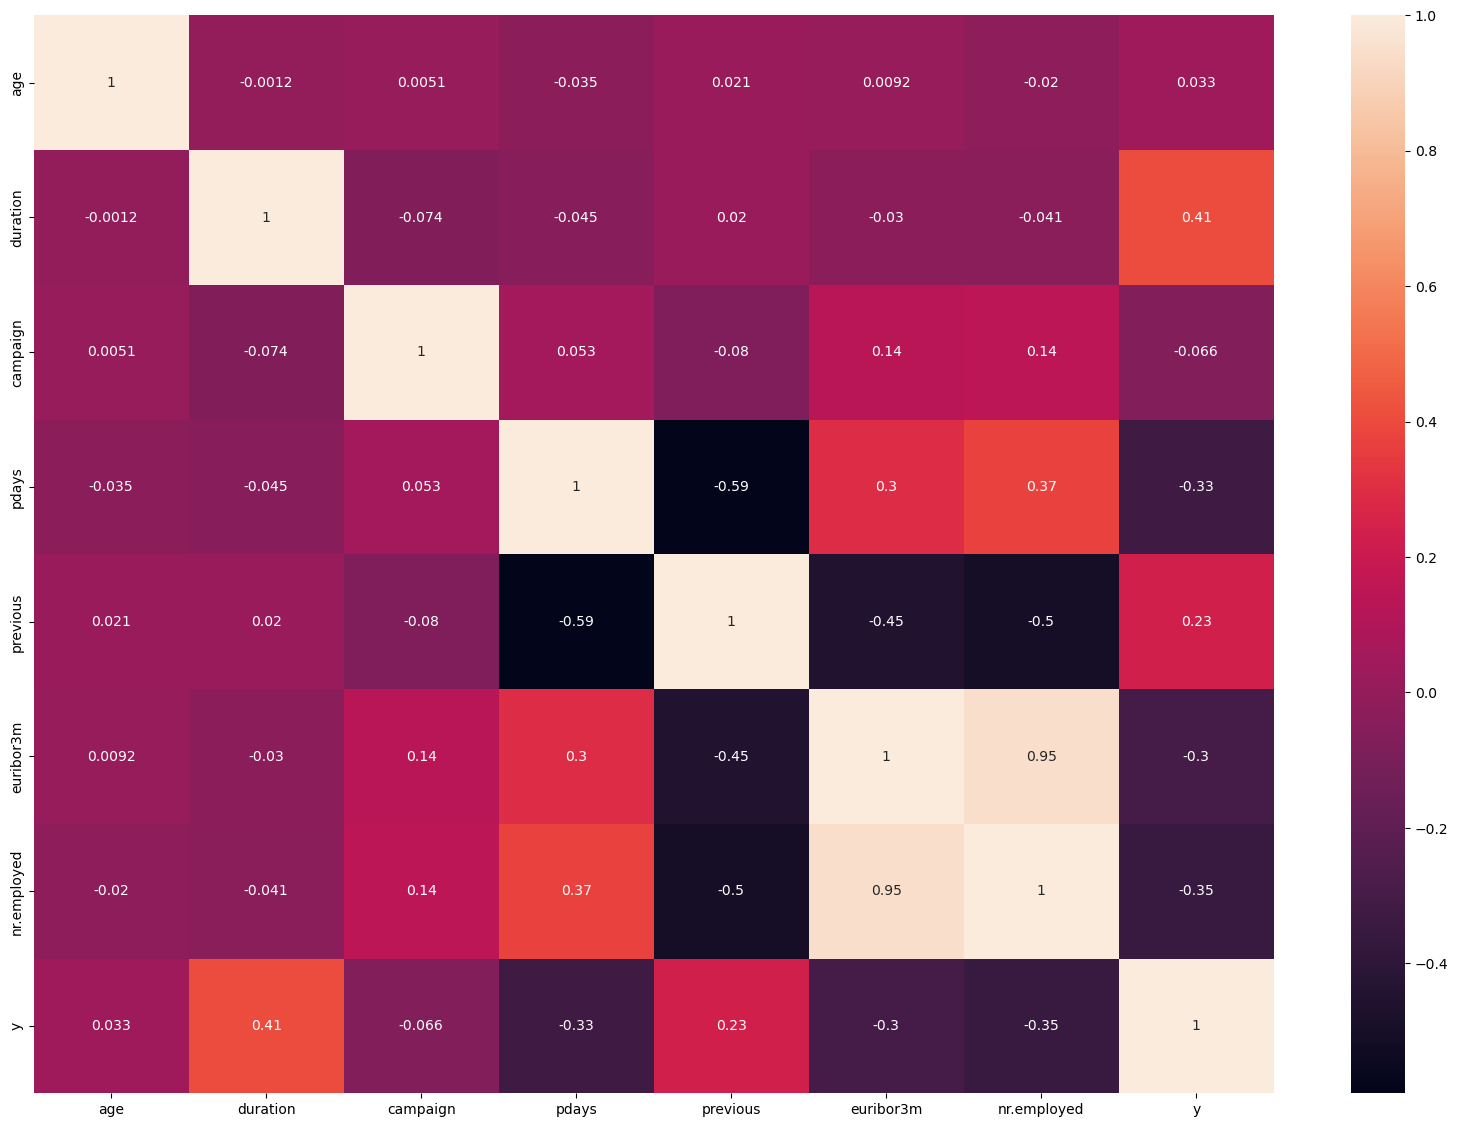

In [44]:
# As you can see, we have found that Duration and Previous are good features in our EDA,
# Our correlation matrix for numeric columns confirms that Duration is actually the best .

data_corr = pd.concat([X_train[num_columns], y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True)

<Axes: >

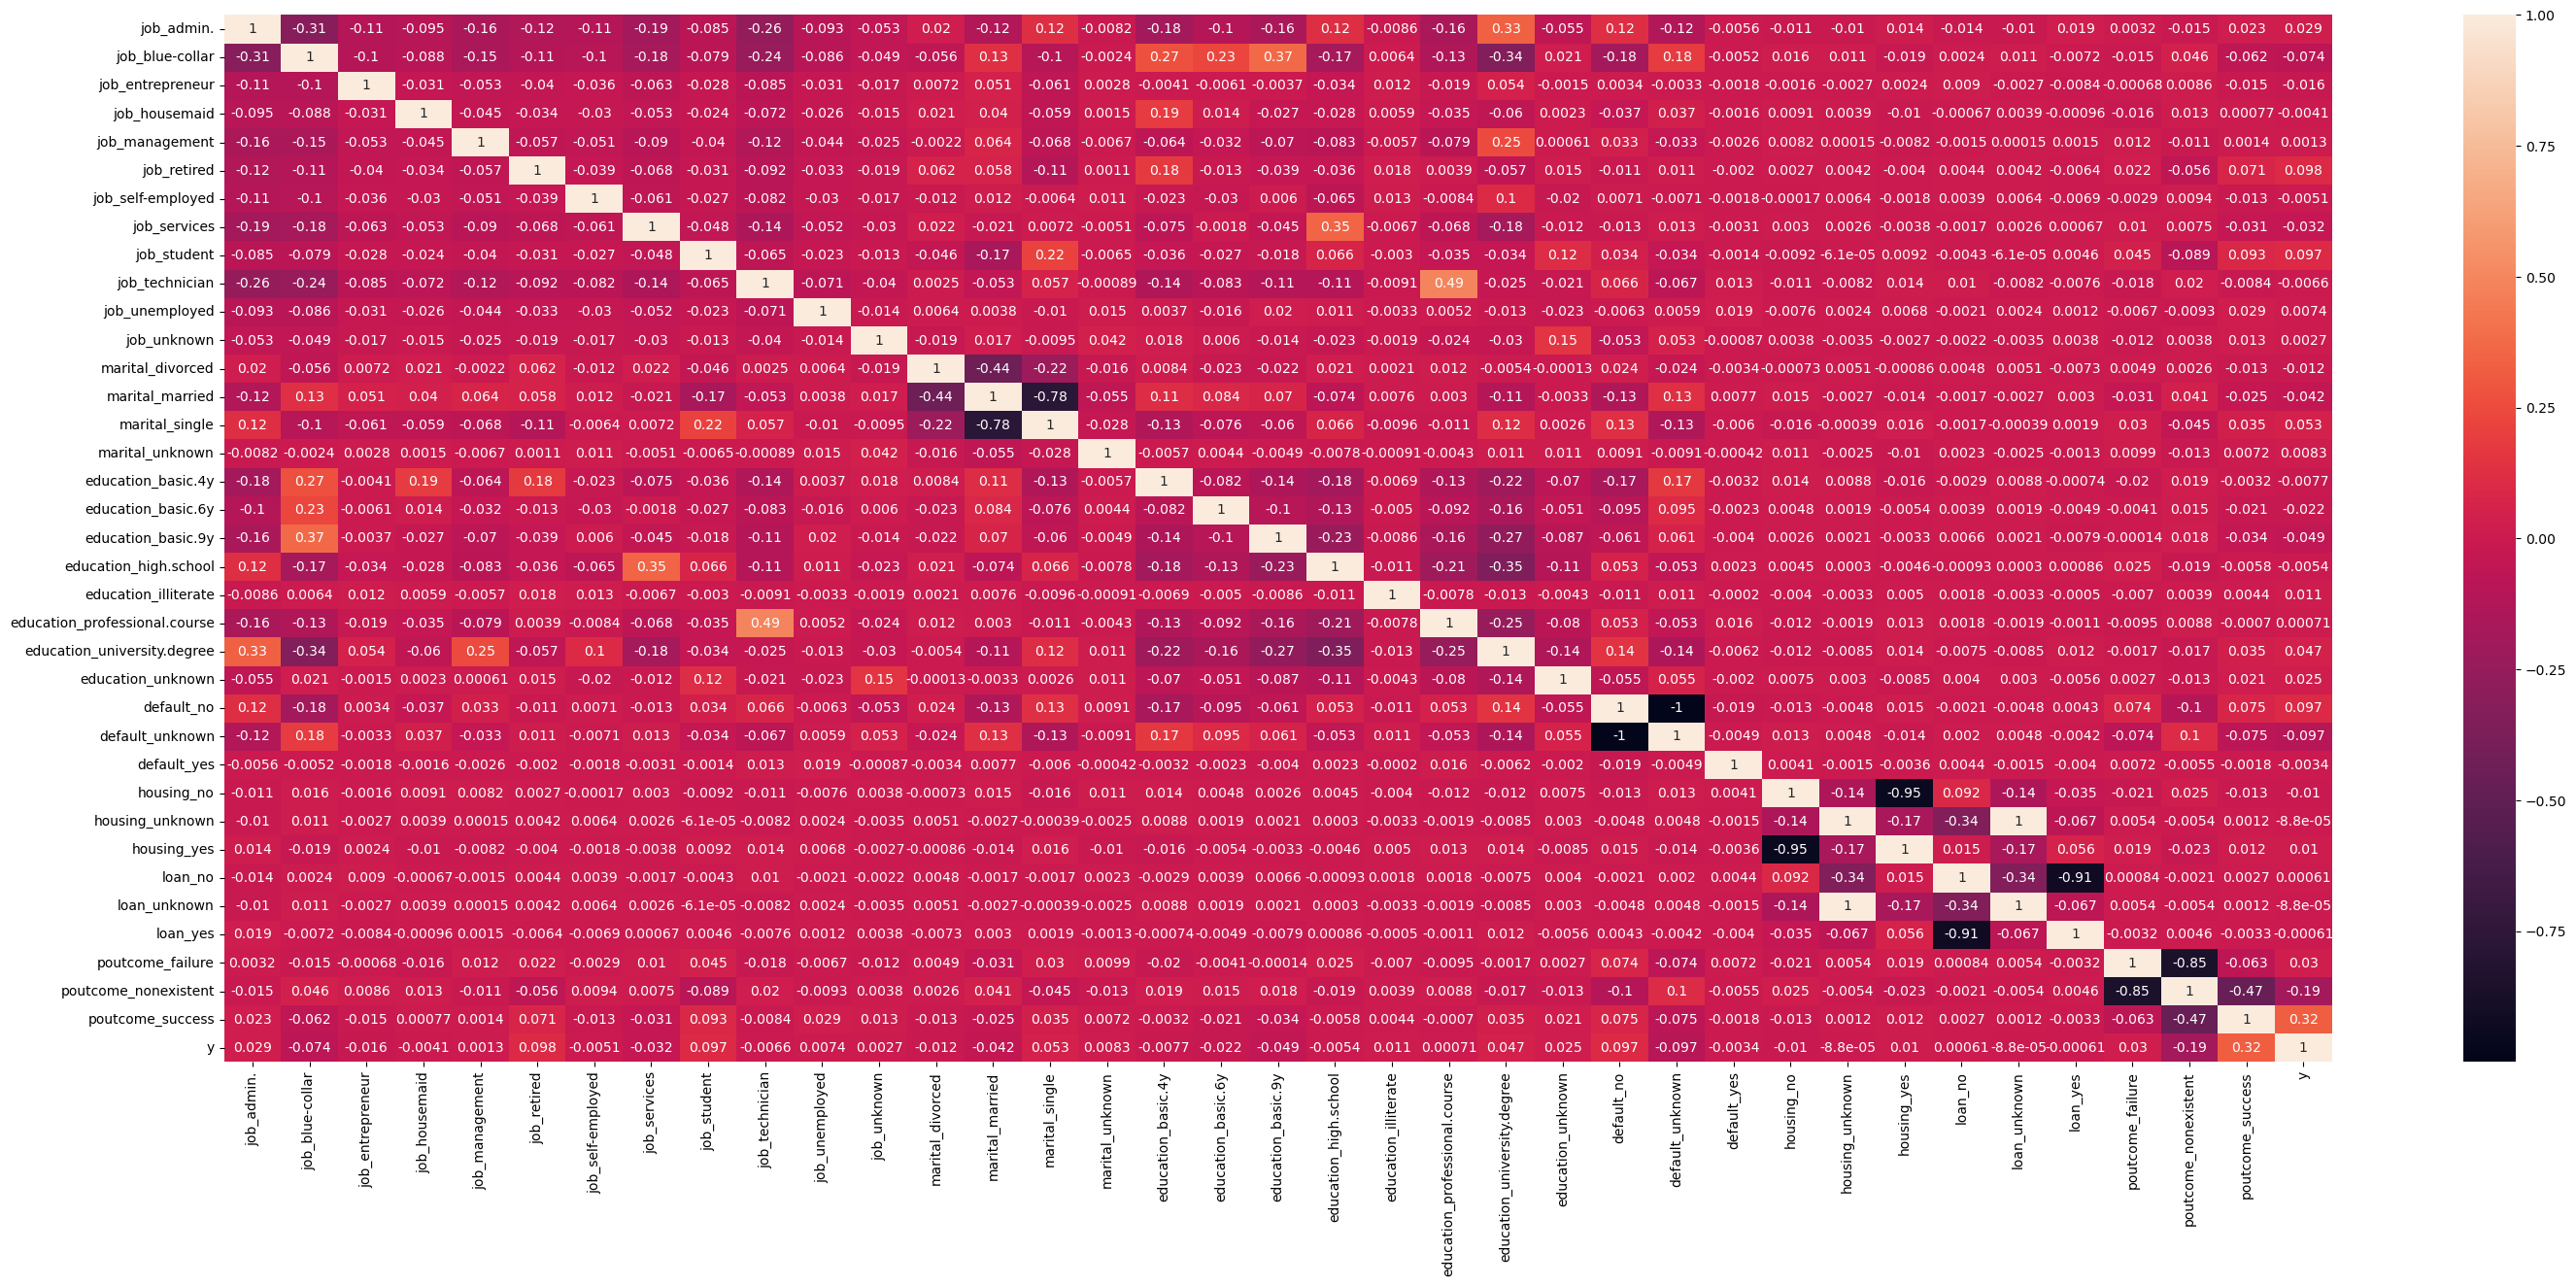

In [45]:
# We also calculate the corr 
data_corr = pd.concat([X_train.drop(num_columns, axis=1) , y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(35,14))
sns.heatmap(corr, annot=True)

# We can see that job_retired, job_student, default_no binary features show better correlation with 'y' label than
# the other categorical values. This is aligned with our EDA from above.

# Also poutcome feature has very strong correlation with y label and is a important feature

### Outlier detection

In this project, we are going to use [**IQR**](https://www.youtube.com/watch?v=qLYYHWYr8xI) to handle outliers in our data.

In [46]:
# first lets take a look at the value counts of every label

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

0    24614
1     8326
Name: job_admin., dtype: int64
------------------------------------------------
0    25486
1     7454
Name: job_blue-collar, dtype: int64
------------------------------------------------
0    31776
1     1164
Name: job_entrepreneur, dtype: int64
------------------------------------------------
0    32090
1      850
Name: job_housemaid, dtype: int64
------------------------------------------------
0    30627
1     2313
Name: job_management, dtype: int64
------------------------------------------------
0    31566
1     1374
Name: job_retired, dtype: int64
------------------------------------------------
0    31834
1     1106
Name: job_self-employed, dtype: int64
------------------------------------------------
0    29761
1     3179
Name: job_services, dtype: int64
------------------------------------------------
0    32246
1      694
Name: job_student, dtype: int64
------------------------------------------------
0    27547
1     5393
Name: job_technician, dtype: in

Here we focus on `age` since it is one of the features with the most number of unique values.

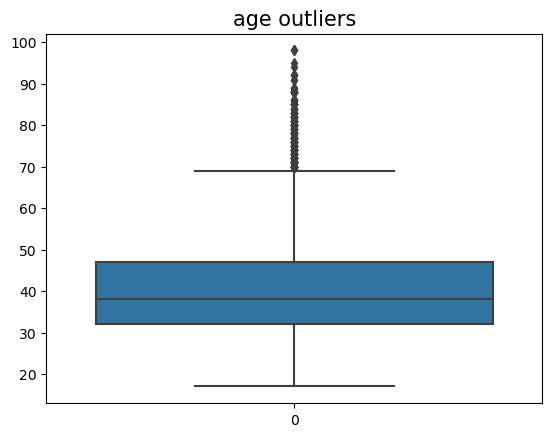

In [47]:
# we will use boxplot to detect outliers

sns.boxplot(X_train['age']);
plt.title('age outliers', fontsize=15);
plt.xlabel('');

In [48]:
threshold = 1.5  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 
            
age_out = X_train['age']
q25, q75 = np.percentile(age_out, 25), np.percentile(age_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in age_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['age'] > upper) | (data_outliers['age'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 32.0 , Quartile 75: 47.0
iqr: 15.0
Cut Off: 22.5
Lower: 9.5
Upper: 69.5
Nubers of Outliers: 379
outliers:[76.0, 70.0, 71.0, 73.0, 74.0, 71.0, 70.0, 86.0, 76.0, 73.0, 77.0, 80.0, 78.0, 76.0, 76.0, 71.0, 81.0, 80.0, 76.0, 73.0, 80.0, 71.0, 71.0, 74.0, 73.0, 73.0, 76.0, 73.0, 71.0, 94.0, 78.0, 80.0, 75.0, 70.0, 72.0, 73.0, 72.0, 70.0, 77.0, 73.0, 70.0, 86.0, 80.0, 70.0, 80.0, 75.0, 74.0, 72.0, 84.0, 79.0, 71.0, 76.0, 82.0, 76.0, 88.0, 71.0, 72.0, 83.0, 72.0, 76.0, 74.0, 88.0, 71.0, 71.0, 79.0, 85.0, 71.0, 71.0, 71.0, 70.0, 83.0, 77.0, 76.0, 80.0, 71.0, 70.0, 74.0, 77.0, 76.0, 92.0, 70.0, 72.0, 80.0, 76.0, 75.0, 92.0, 82.0, 76.0, 72.0, 70.0, 75.0, 71.0, 71.0, 80.0, 78.0, 71.0, 80.0, 70.0, 77.0, 75.0, 82.0, 72.0, 88.0, 70.0, 79.0, 77.0, 75.0, 70.0, 88.0, 76.0, 79.0, 74.0, 80.0, 73.0, 76.0, 74.0, 70.0, 75.0, 78.0, 71.0, 82.0, 71.0, 83.0, 76.0, 78.0, 92.0, 81.0, 70.0, 74.0, 74.0, 72.0, 86.0, 76.0, 75.0, 77.0, 73.0, 77.0, 73.0, 74.0, 73.0, 84.0, 77.0, 70.0, 84.0, 72.0, 74.0, 70.0,

In [49]:
X_train = data_outliers.drop('y', axis=1)
y_train = data_outliers['y']

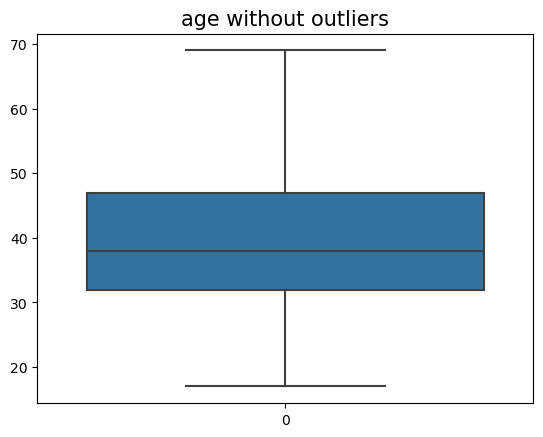

In [50]:
sns.boxplot(X_train['age']);
plt.title('age without outliers', fontsize=15);
plt.xlabel('');


### Feature Selection

<Axes: >

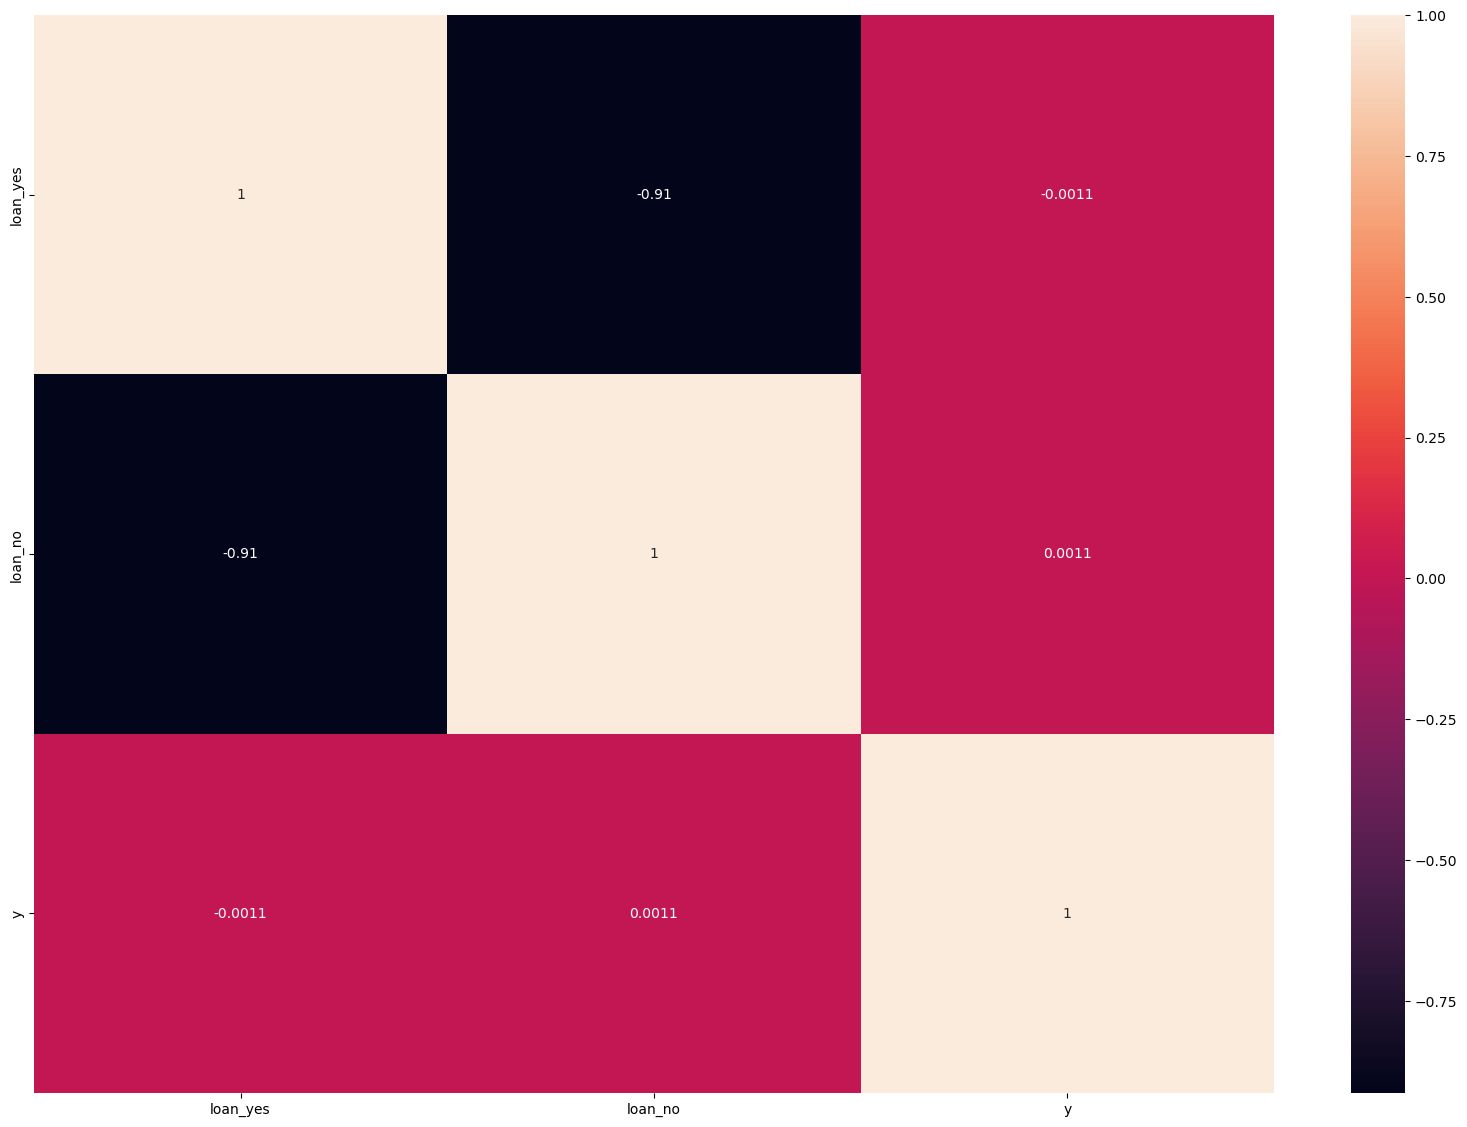

In [51]:
data_corr = pd.concat([X_train[['loan_yes', 'loan_no']], y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True)

# Both loan values (yes, no) got really bad correlation with y label(-0.0011). Let's try remove it 

In [52]:
X_train.drop(['loan_no', 'loan_yes'], axis=1, inplace=True)

# Model Evaluation

Here we perform the same process similar to we did in training data

In [53]:
X_test.drop(['loan_yes', 'loan_no'], axis=1, inplace=True)
X_test.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,euribor3m,nr.employed
39049,0,0,0,0,0,1,0,0,0,0,...,1,0,0,70.0,325.0,1.0,999.0,2.0,0.715,5023.5
11186,1,0,0,0,0,0,0,0,0,0,...,0,1,0,54.0,361.0,1.0,999.0,0.0,4.961,5228.1
25302,0,0,0,0,0,1,0,0,0,0,...,0,1,0,56.0,972.0,2.0,999.0,0.0,4.153,5195.8
28929,0,0,0,0,0,0,0,0,0,1,...,0,1,0,35.0,86.0,1.0,999.0,0.0,1.405,5099.1
31094,0,1,0,0,0,0,0,0,0,0,...,0,1,0,33.0,473.0,4.0,999.0,0.0,1.334,5099.1


In [56]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.657954
 rec     0.382123
 f1      0.483139
 loss    3.197995
 acc     0.911274
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.594480
 rec     0.486566
 f1      0.534835
 loss    3.308691
 acc     0.908203
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.636446
 rec     0.210582
 f1      0.316093
 loss    3.557762
 acc     0.901293
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
 pre     0.624301
 rec     0.424842
 f1      0.505220
 loss    3.248922
 acc     0.909861
Name: 0, dtype: float64
------------------------------


In [57]:
X_train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_nonexistent,poutcome_success,age,duration,campaign,pdays,previous,euribor3m,nr.employed
36454,0,0,0,0,0,0,0,0,0,1,...,1,0,0,24.0,122.0,2.0,999.0,1.0,1.262,5076.2
1233,0,1,0,0,0,0,0,0,0,0,...,0,1,0,32.0,1119.0,1.0,999.0,0.0,4.855,5191.0
24112,0,0,0,0,0,0,0,0,1,0,...,0,1,0,27.0,72.0,1.0,999.0,0.0,4.245,5195.8
15517,0,0,0,0,0,0,0,0,0,1,...,0,1,0,25.0,216.0,2.0,999.0,0.0,4.957,5228.1
17917,1,0,0,0,0,0,0,0,0,0,...,0,1,0,47.0,403.0,3.0,999.0,0.0,4.961,5228.1


In [58]:
for name,model in models.items():
    print(name, end=':\n')
    eval_metrics(y_test, model.predict(X_test))
    print('-'*40)

LogisticRegression:
  pre: 0.645
  rec: 0.383
  f1: 0.480
  loss: 3.361
  acc: 0.907
----------------------------------------
KNeighborsClassifier:
  pre: 0.593
  rec: 0.496
  f1: 0.540
  loss: 3.431
  acc: 0.905
----------------------------------------
SVC:
  pre: 0.606
  rec: 0.207
  f1: 0.308
  loss: 3.768
  acc: 0.895
----------------------------------------
RandomForestClassifier:
  pre: 0.626
  rec: 0.431
  f1: 0.511
  loss: 3.357
  acc: 0.907
----------------------------------------


**Conclusion:**

We can see our Random Forest models have the best performance here. However, our F1-score is still in the lower range than what we are expecting. 

# Data Imbalance Handling

## SMOTE

The percentage of Y class : 0.11
The percentage of N class : 0.89


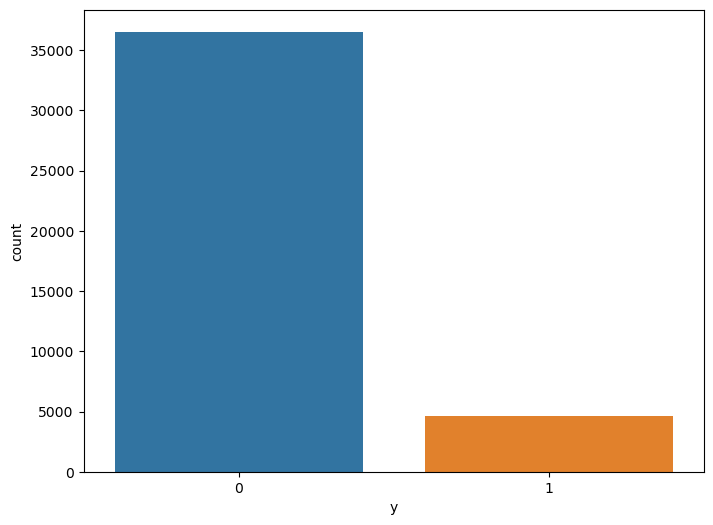

In [59]:
# let's look at the target ratio again

plt.figure(figsize=(8,6))
sns.countplot(df, x= "y");

print('The percentage of Y class : %.2f' % (df['y'].value_counts()[1] / len(df)))
print('The percentage of N class : %.2f' % (df['y'].value_counts()[0] / len(df)))


# We can consider it as imbalanced data

In [60]:
# We can see that our data is very imbalance. To handle data imbalance, we will install the imbalanced-learn library.

!pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0, n_jobs=8)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [62]:
models.pop('SVC') # We remove SVC here since its training takes too long.
train_eval_cross(models, X_train_resampled, y_train_resampled, skf)

LogisticRegression :
 pre     0.890088
 rec     0.898443
 f1      0.894205
 loss    3.834319
 acc     0.893620
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.861874
 rec     0.978194
 f1      0.916337
 loss    3.219698
 acc     0.910672
Name: 0, dtype: float64
------------------------------
RandomForestClassifier :
 pre     0.958544
 rec     0.940437
 f1      0.949401
 loss    1.806657
 acc     0.949876
Name: 0, dtype: float64
------------------------------


In [64]:
for name,model in models.items():
    print(name, end=':\n')
    eval_metrics(y_test, model.predict(X_test))
    print('-'*40)

LogisticRegression:
  pre: 0.461
  rec: 0.755
  f1: 0.573
  loss: 4.578
  acc: 0.873
----------------------------------------
KNeighborsClassifier:
  pre: 0.378
  rec: 0.802
  f1: 0.514
  loss: 6.167
  acc: 0.829
----------------------------------------
RandomForestClassifier:
  pre: 0.601
  rec: 0.508
  f1: 0.550
  loss: 3.370
  acc: 0.906
----------------------------------------


**Conclusion:**

Using SMOTE to oversampling the minority class, increase the F1-score from 0.539 to 0.542, which is very small. 

## Combined Methods

We will try other combine techniques using both oversampling and undersampling such SMOTEENN, SMOTETomek

In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek

sm = SMOTEENN(random_state=0, n_jobs=8)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
train_eval_cross(models, X_train_resampled, y_train_resampled, skf)

In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test))
    print('-'*40)

In [ ]:
sm = SMOTETomek(random_state=0, n_jobs=8)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
train_eval_cross(models, X_train_resampled, y_train_resampled, skf)

In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test))
    print('-'*40)

**Conclusion:**

Using SMOTEENN, which combines both undersampling and oversampling method significantly increases the F1-score to 0.6 (compared to SMOTE with F1-score of 0.542)